In [1]:
from conversions import get_conversions
from stats import frequentist_stats, bayesian_stats, graph_prob_curves

from sumatra import OptimizeClient
client=OptimizeClient('console.sumatra.ai', workspace='timothy')
client.list_optimizations()

[{'holdoutPercentage': 0,
  'id': '01eee300-5091-428d-86f9-76379a9ea60c',
  'name': 'Optimization',
  'rootPage': 'https://www.utexas.edu',
  'slug': 'optimization'}]

In [2]:
conversions = get_conversions(client)
conversions

,optimization,experience,experiment,variant,user_count,converted_user_count
0,optimization,three-way-test,exp-20240315192012,variant-a,701,26
1,optimization,personalization,exp-20240315191958,default,2083,94
2,optimization,two-way-test,exp-20240315192015,variant-a,1040,39
3,optimization,three-way-test,exp-20240315192012,control,689,36
4,optimization,two-way-test,exp-20240315192015,variant-b,1043,55
5,optimization,three-way-test,exp-20240315192012,variant-b,693,32


In [3]:
frequentist_stats(conversions)

,optimization,experience,experiment,variant,versus,lift,confidence
0,optimization,personalization,exp-20240315191958,default,default,0.000000,0.000000
1,optimization,three-way-test,exp-20240315192012,control,variant-a,0.408731,0.828971
2,optimization,three-way-test,exp-20240315192012,control,control,0.000000,0.000000
3,optimization,three-way-test,exp-20240315192012,control,variant-b,0.131531,0.398290
4,optimization,three-way-test,exp-20240315192012,variant-a,variant-a,0.000000,0.000000
5,optimization,three-way-test,exp-20240315192012,variant-a,control,-0.290141,0.828971
6,optimization,three-way-test,exp-20240315192012,variant-a,variant-b,-0.196772,0.604351
7,optimization,three-way-test,exp-20240315192012,variant-b,variant-a,0.244977,0.604351
8,optimization,three-way-test,exp-20240315192012,variant-b,control,-0.116242,0.398290
9,optimization,three-way-test,exp-20240315192012,variant-b,variant-b,0.000000,0.000000


In [4]:
bayesian_stats(conversions)

,optimization,experience,experiment,variant,versus,conversion_rate,sample_mean,sample_stdev,sample_min,sample_max,prob_beats,prob_best
0,optimization,personalization,exp-20240315191958,default,default,0.045127,0.045567,0.004560,0.026820,0.071377,0.000000,1.000000
1,optimization,three-way-test,exp-20240315192012,variant-a,variant-a,0.037090,0.038426,0.007243,0.013629,0.077934,0.000000,0.047125
2,optimization,three-way-test,exp-20240315192012,variant-a,control,0.037090,0.038426,0.007243,0.013629,0.077934,0.087245,0.047125
3,optimization,three-way-test,exp-20240315192012,variant-a,variant-b,0.037090,0.038426,0.007243,0.013629,0.077934,0.198955,0.047125
4,optimization,three-way-test,exp-20240315192012,control,variant-a,0.052250,0.053569,0.008578,0.023761,0.101655,0.912755,0.668265
5,optimization,three-way-test,exp-20240315192012,control,control,0.052250,0.053569,0.008578,0.023761,0.101655,0.000000,0.668265
6,optimization,three-way-test,exp-20240315192012,control,variant-b,0.052250,0.053569,0.008578,0.023761,0.101655,0.697760,0.668265
7,optimization,three-way-test,exp-20240315192012,variant-b,variant-a,0.046176,0.047499,0.008061,0.019629,0.089135,0.801045,0.284610
8,optimization,three-way-test,exp-20240315192012,variant-b,control,0.046176,0.047499,0.008061,0.019629,0.089135,0.302240,0.284610
9,optimization,three-way-test,exp-20240315192012,variant-b,variant-b,0.046176,0.047499,0.008061,0.019629,0.089135,0.000000,0.284610


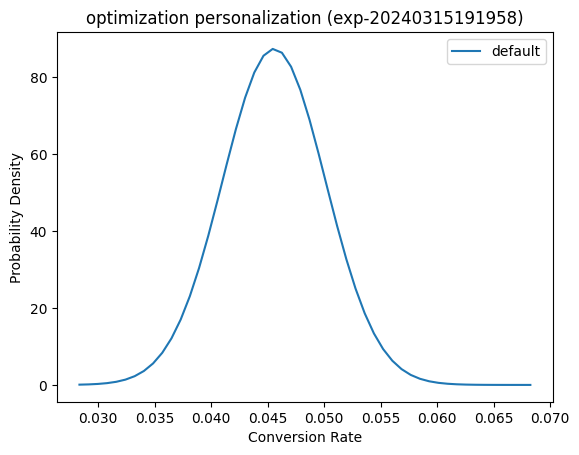

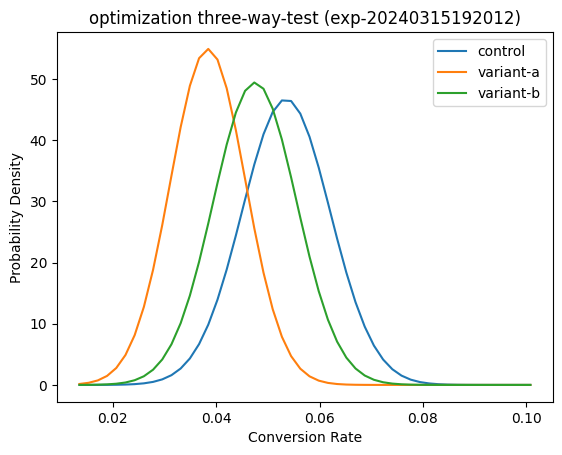

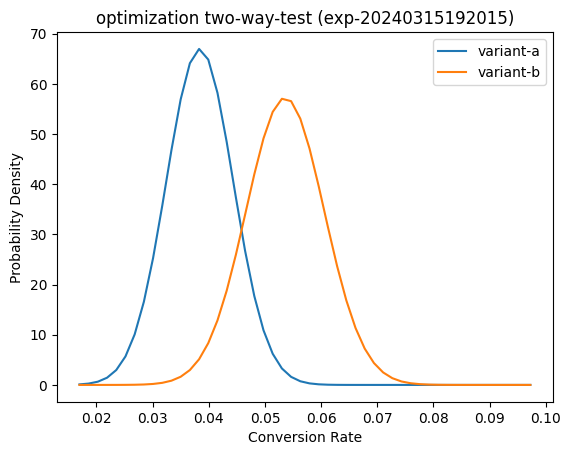

In [5]:
bayes = bayesian_stats(conversions)
for _, stats in bayes.groupby(['optimization', 'experience', 'experiment']):
    graph_prob_curves(stats)